Step 1: Loading and preparing data...
Data preparation complete! There are 2385260 valid records for analysis.

--- Step 2: Aggregating production quantity by month ---
Monthly production statistics (first 5 months):
transmission_production_date
2008-11-30    13712
2008-12-31    25307
2009-01-31    25184
2009-02-28    22906
2009-03-31    25382
Freq: ME, dtype: int64

--- Step 3: Generating production trend chart ---


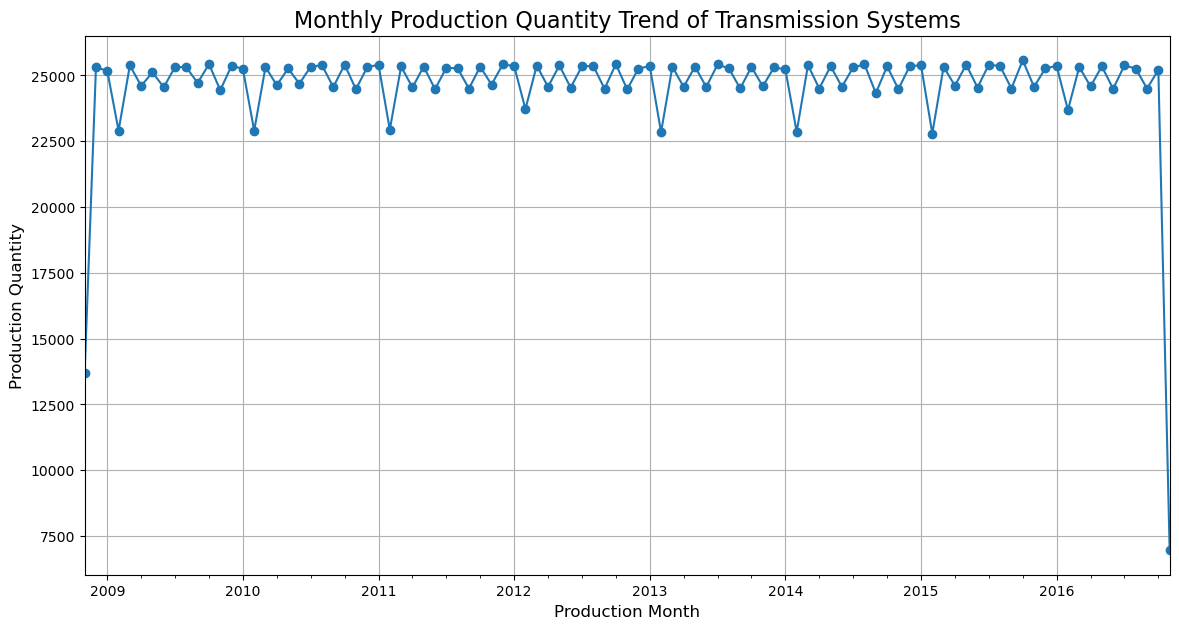


Chart generated successfully!


In [2]:
# -*- coding: utf-8 -*-
# Purpose: To analyze and visualize the production quantity trend of transmission systems over time.
# Version: 2.0 - Adapted for the new project file structure

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration and Helper Functions ---
# According to the new project structure, the final dataset file is in the same directory as the Notebook
FINAL_DATASET_FILE = Path("./Final_dataset_group_23.csv")

def read_final_csv(file_path: Path) -> pd.DataFrame:
    """Reads the final CSV dataset."""
    try:
        df = pd.read_csv(file_path, sep=",", quotechar='"', encoding="utf-8", engine="python")
        return df
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        raise

# -----------------------------
# Step 1: Load and prepare data
# -----------------------------
print("Step 1: Loading and preparing data...")
if not FINAL_DATASET_FILE.exists():
    # Provide a more detailed error message
    raise FileNotFoundError(f"Final dataset file not found! Please confirm that '{FINAL_DATASET_FILE.name}' is in the same folder as your .ipynb file.")

df = read_final_csv(FINAL_DATASET_FILE)

# --- Data preprocessing ---
# Define the production date column we need
prod_date_col = 'transmission_production_date'

# Check if the column exists
if prod_date_col not in df.columns:
    raise ValueError(f"Error: Necessary column '{prod_date_col}' is missing from the dataset.")

# Convert the production date column to datetime format, coercing errors to NaT (Not a Time)
df[prod_date_col] = pd.to_datetime(df[prod_date_col], errors='coerce')

# Drop rows where the date is null
df.dropna(subset=[prod_date_col], inplace=True)

print(f"Data preparation complete! There are {len(df)} valid records for analysis.")

# -----------------------------
# Step 2: Aggregate data by time
# -----------------------------
print("\n--- Step 2: Aggregating production quantity by month ---")

# We set the date as the dataframe's index, which makes resampling by time easy
df.set_index(prod_date_col, inplace=True)

# Resample the data by month ('ME' for Month-End) and calculate the number of records (i.e., production quantity) for each month
monthly_production = df.resample('ME').size()

print("Monthly production statistics (first 5 months):")
print(monthly_production.head())


# -----------------------------
# Step 3: Generate production trend chart
# -----------------------------
print("\n--- Step 3: Generating production trend chart ---")

# --- Plotting the time series ---
plt.figure(figsize=(14, 7))
monthly_production.plot(kind='line', marker='o', linestyle='-')

plt.title("Monthly Production Quantity Trend of Transmission Systems", fontsize=16)
plt.xlabel("Production Month", fontsize=12)
plt.ylabel("Production Quantity", fontsize=12)
plt.grid(True)
plt.show()

print("\nChart generated successfully!")
